# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***
$$w_{new}=w_{old}-\alpha\nabla_{w}Q^*_r(w_{old}), \text{ где }$$
$$\nabla_{w}Q^*_r(w)=\frac{1}{n}\sum_{j=1}^n\nabla_{w}L(x_j\cdot w, y_j) + \frac{1}{C}\nabla_{w}\sum_{j=1}^{D}w_j^2=\frac{1}{n}\sum_{j=1}^n\nabla_{w}(x_j\cdot w - y_j)^2 + \frac{1}{C}\nabla_{w}w^2= \frac{2}{n}\sum_{j=1}^n(x_j\cdot w - y_j) x_j + \frac{2}{C}w$$
В матричном виде:
$$\nabla_{w}Q^*_r(w)=\frac{2}{n}X^T(Xw-y) + \frac{2}{C}w$$
где $X$ - матрица $n\times D$, $w$ - вектор $D\times 1$, $y$ - вектор $n\times 1$, $D$-кол-во фич.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***
$$ w_{new} = w_{old} - \alpha\nabla_wQ^*_r(w_{old}), \text{ где } $$
$$\nabla_wQ^*_r(w) = \nabla_w\left( -\frac{1}{n}\left[\sum_{i=1}^n y_i\log\sigma(\langle\,x_i,w\rangle)+(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle))\right]+ \frac{1}{C}\sum_{j=1}^{D}w_j^2\right)=$$
$$=-\frac{1}{n}\left[\sum_{i=1}^n \nabla_wy_i\log\sigma(\langle\,x_i,w\rangle)+\nabla_w(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle))\right]+ \frac{2}{C}w$$

Посчитаем отдельно слагаемые:
$$\nabla_wy_i\log\sigma(\langle\,x_i,w\rangle)+\nabla_w(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle)=y_i\frac{\nabla_w\sigma(\langle\,x_i,w\rangle)}{\sigma(\langle\,x_i,w\rangle)}+(1-y_i)\frac{\nabla_w(1-\sigma(\langle\,x_i,w\rangle)}{1-\sigma(\langle\,x_i,w\rangle}$$

Рассмотрим градиент $\sigma(w)$:
$$\nabla_w\sigma(w) = \nabla_w\frac{1}{1 + e^{-w}}=\frac{e^{-w}}{\left(1 + e^{-w}\right)^2}=\sigma(w)\frac{e^{-w}}{\left(1 + e^{-w}\right)}=\sigma(w)(1-\sigma(w))$$

Соответственно градиент $\sigma(\langle\,x_i,w\rangle):$
$$\nabla_w\sigma(\langle\,x_i,w\rangle)=x_i\sigma(\langle\,x_i,w\rangle)(1-\sigma(\langle\,x_i,w\rangle))$$

Тогда общая формула принимает вид:
$$\nabla_wQ^*_r(w)=-\frac{1}{n}\left[\sum_{i=1}^n x_iy_i(1-\sigma(\langle\,x_i,w\rangle))-x_i(1-y_i)\sigma(\langle\,x_i,w\rangle)\right]+ \frac{2}{C}w=\frac{1}{n}\left[\sum_{i=1}^n x_i(\sigma(\langle\,x_i,w\rangle)-y_i)\right]+ \frac{2}{C}w$$
В матричном виде:
$$\nabla_{w}Q^*_r(w)=\frac{1}{n}X^T(\sigma(\langle X,w\rangle)-y) + \frac{2}{C}w$$
где $X$ - матрица $n\times D$, $w$ - вектор $D\times 1$, $y$ - вектор $n\times 1$, $D$-кол-во фич.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

**I.**
В модели линейной регрессии c квадратичной функцией потерь функционал качества принимал вид:
$$Q(X,w)=\frac{1}{N}\sum_{i=1}^N(x_i\cdot w - y_i)^2=\frac{1}{N}\Vert X\cdot w - y\Vert^2$$
На лекции мы посчитали первый градиент:
$$\nabla_wQ(X,w) = \frac{2}{N}X^T(Xw-y)$$
Для нахождения Гессиана возьмем второй градиент:
$$\nabla^2_wQ(X,w) = \nabla_w\frac{2}{N}X^T(Xw-y)=\frac{2}{N}X^TX$$
Из курса линейной алгебры знаем, что матрица вида $X^TX$ является матрицей Грама и одним из её свойств является положительная определенность, а это значит что по достаточному признаку найденный нами $w$ является минимумом.

**II.**
Функционал качества с $L2$ регуляризацией принимает вид:
$$Q_r(w)=\frac{1}{N}\sum_{i=1}^N(x_i\cdot w - y_i)^2+\frac{1}{C}\sum_{j=1}^Dw_j^2$$
Ищем точное решение:
$$\nabla_wQ_r(w)=\frac{1}{N}\sum_{i=1}^N\nabla_w(x_i\cdot w - y_i)^2+\frac{1}{C}\nabla_w\sum_{j=1}^Dw_j^2=
\frac{2}{N}\sum_{i=1}^Nx_i(x_i\cdot w - y_i)+\frac{2}{C}\sum_{j=1}^Dw_j=0$$
Запишем это уравнение в матричном виде:
$$\frac{2}{N}X^T(X\cdot w-y)+\frac{2}{C}w=0$$
$$w\left(\frac{1}{N}X^TX + \frac{1}{C}I\right)=\frac{1}{N}X^Ty$$
$$w=\left(X^TX + \frac{N}{C}I\right)^{-1}X^Ty$$
Таким образом с помощью регуляризации решается проблема обратимости матрицы $X^TX$.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
Найдем минимум, используя необходимый и достаточный признак экстремума:
$$E'_{x_i}(L | x_i) = -\frac{p(y_i = 1 |x_i )}{a(x_i)}+\frac{p(y_i=0|x_i)}{1-a(x_i)}=0$$
$$\frac{a(x_i)p(y_i=0|x_i) - (1-a(x_i))p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$\frac{a(x_i)p(y_i=0|x_i) - p(y_i=1|x_i) + a(x_i)p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$\frac{a(x_i)\overset{=1}{(p(y_i=0|x_i)+p(y_i=1|x_i))} - p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$a(x) = p(y_i=1|x_i)$$
Убедимся, что это минимум:
$$E''_{x_ix_i}(L(p(y_i=1|x_i))|x_i)=\left(\frac{a(x_i)-p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}\right)'_{x_i=p(y_i=1|x_i))}=\left(\frac{a^2(x_i)+p(y_i=1|x_i)(1-2a(x_i))}{(a(x_i)(1-a(x_i)))^2}\right)_{x_i=p(y_i=1|x_i))}=$$
$$=\frac{p(y_i=1|x_i))^2+p(y_i=1|x_i)(1-2p(y_i=1|x_i)))}{(p(y_i=1|x_i)(1-p(y_i=1|x_i)))^2}=\frac{1}{p(y_i=1|x_i)(1-p(y_i=1|x_i))} > 0$$
Действительно, $a(x) = p(y_i=1|x_i)$ - точка минимума.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Мы вводили $w_0$ для сдвига нашей апроксимирующей функции при нулевых фичах. Нет смысла добавлять $w_0$ в регуляризацию, так как она предназначена для регулировки весов, что никак не связано со сдвигом.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





In [2]:
from sklearn.utils import shuffle as shuff

In [3]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle is True:
        X, y = shuff(X, y, random_state=42)
    for i in range(X.shape[0] // batch_size):
        X_batch = X[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield (X_batch, y_batch)

In [4]:
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1./(1. + np.exp(-x))

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator=batch_generator, C=1, alpha=0.01,
                 max_epoch=5, model_type='lin_reg',
                 batch_size=1, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold  = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        prediction = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            probability = sigmoid(prediction)
            loss = -np.mean(y_batch * np.log2(probability)
                             + (1 - y_batch) * np.log2(1 - probability))
        else:
            loss = np.mean((prediction - y_batch) ** 2)
        
        loss += (1 / self.C) * np.sum(self.weights[1:] ** 2)
        return loss
        
        
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """ 
        prediction = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            probability = sigmoid(prediction)
            loss_grad = np.dot(X_batch.T, (probability - y_batch))
        else:
            loss_grad = np.dot(X_batch.T, (prediction - y_batch))
        
        loss_grad /= y_batch.shape[0]
        loss_grad += (2 / self.C) * np.r_[0, self.weights[1:]]
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Добавляем тождественную фичу для сдвига w_0
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.random.rand(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)

                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        return (y_hat >= self.threshold).astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
def plot_decision_boundary(clf, X):
    w_0, w_1, w_2 = clf.weights

    decision_bound = -(w_1 * X[:, 0]) / w_2
    plt.plot(X[:, 0], decision_bound, label=clf.model_type)

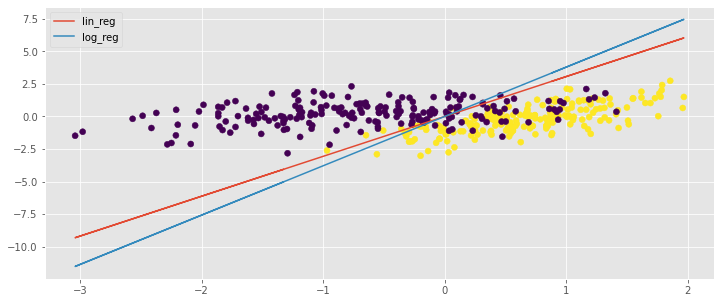

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = StandardScaler().fit_transform(X, y)

for clf in MySGDClassifier(batch_size=10, model_type='lin_reg').fit(X, y), \
           MySGDClassifier(batch_size=10, model_type='log_reg').fit(X, y):
    plot_decision_boundary(clf, X)

plt.legend()
plt.scatter(X[:,0], X[:,1], c=y);

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

X = StandardScaler().fit_transform(X, y)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

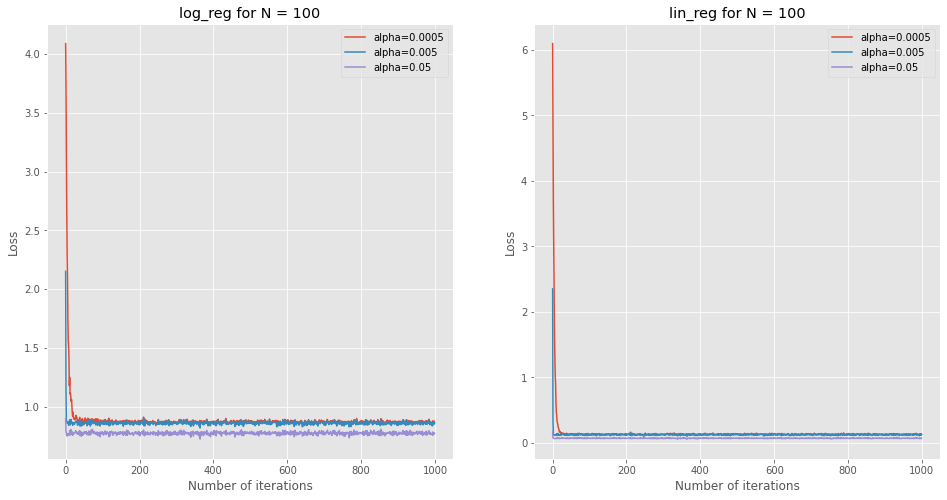

CPU times: user 38.3 s, sys: 0 ns, total: 38.3 s
Wall time: 38.3 s


In [10]:
%%time
N = 100
alphas = np.array([0.0005, 0.005, 0.05])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
models = ['log_reg', 'lin_reg']

for ax, model in zip(axes.flatten(), models):
    ax.set_title(f'{model} for N = {N}')
    ax.set(xlabel='Number of iterations', ylabel='Loss')
    for alpha in alphas:
        clf = MySGDClassifier(max_epoch=1,
                              batch_size=16,
                              alpha=alpha, model_type=model).fit(X, y)
        losses = np.asarray(clf.errors_log['loss'])
        mean = np.asarray([
                np.mean(losses[i:i + N]) 
                for i in range(0, losses.shape[0], N)
        ])
        ax.plot(mean, label=f'alpha={alpha}')
        ax.legend(loc='upper right')

plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Ответ:**
Заметно, что чем больше `alpha`, тем быстрее происходит сходимость. Но при росте `alpha` также растет и антиградиент, то есть мы начинаем перепрыгивать искомый минимум. Идеально брать `alpha` сначала побольше, а зачем уменьшать.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

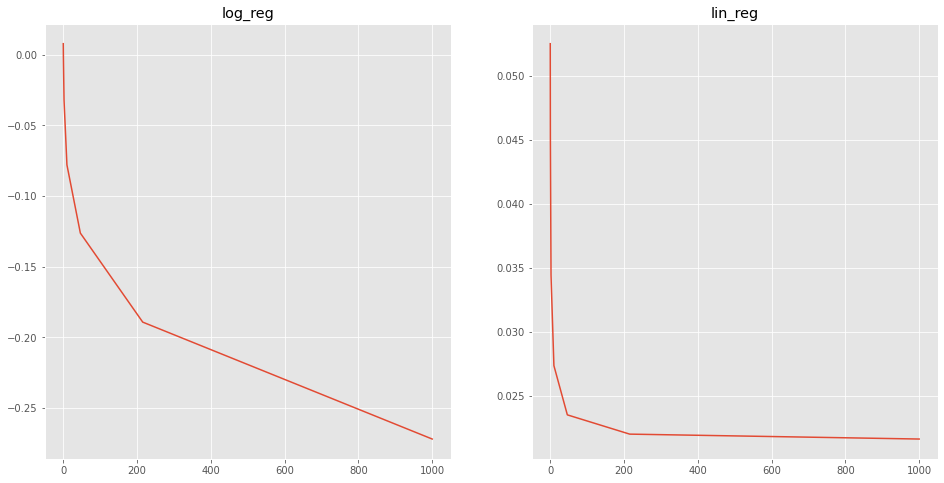

CPU times: user 2min 9s, sys: 253 ms, total: 2min 9s
Wall time: 2min 9s


In [11]:
%%time
np.seterr(all='ignore')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
models = ['log_reg', 'lin_reg']
C = np.logspace(3, -3, 10)

for ax, model in zip(axes.flatten(), models):
    ax.set_title(f'{model}')
    w = []
    for c in C:
        clf = MySGDClassifier(max_epoch=1, batch_size=16, alpha=0.05,
                              C=c, model_type=model).fit(X, y)
        w.append(np.mean(clf.weights))
    ax.plot(C, w)

plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [12]:
doc_to_title = {}
with open('data/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
len(doc_to_title)

28026

In [13]:
import pandas as pd
train_data = pd.read_csv('data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']

    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        print(k, (doc_id, title, target_id))
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X = np.array(X_train)
y = np.array(y_train)
groups = np.array(groups_train)
print (X.shape, y.shape, groups.shape)

0 (15731, 'ВАЗ 21213 | Замена подшипников ступицы | Нива', 0)
1 (14829, 'Ваз 2107 оптом в Сочи. Сравнить цены, купить потребительские товары на Tiu.ru', 0)
2 (15764, 'Купить ступица Лада калина2. Трансмиссия - переходные ступицы цена, замена, тюнинг.', 0)
3 (17669, 'Классика 21010 - 21074', 0)
4 (14852, 'Ступица Нива — замена подшипника своими руками', 0)
5 (15458, 'ВАЗ 2110', 0)
6 (14899, 'Обзор подшипников полуоси ВАЗ 2101-07, 2121,2123', 0)
7 (16879, 'Купить Подшипники и ступицы FAG (Страница 23)', 0)
8 (16310, 'HorsePowers — автомобильный интернет портал » Отзыв владельца ВАЗ 2121 Нива 2007 года', 0)
9 (15440, 'Новости и сообщения из официальной группы Вконтакте торговой компании 33 Sport - Магазины - Тольятти', 0)
10 (16242, 'Инструкция по замене подшипника передней ступицы ивеко дейли через dorognoekam.ru', 0)
11 (16383, 'Ступицы - OLX.ua - страница 80', 0)
12 (15580, 'маааленькая проблемка — бортжурнал Автокам 2160 ╬ 1994 года на DRIVE2', 0)
13 (16840, 'Разгруженные полуоси для 

37 (16721, 'Как не ошибиться с размером тюли при самостоятельном ее пошиве', 0)
38 (16442, 'Правильная длина штор до пола: какой должна быть', 1)
39 (15950, 'Энциклопедия штор: самостоятельный пошив, выбор, фото', 0)
40 (16292, 'Какой длины должен быть карниз для штор | Школа Studyas.com', 0)
41 (17144, 'Какой длины должны быть шторы | Ковер24.РУ', 1)
42 (17564, 'ГИД по шторам | Goodhouse.ru', 1)
43 (16280, 'Шторы для кухни, Оформляем кухонные шторы вместе', 0)
44 (15380, 'Как сшить шторы своими руками для кухни, гостиной, спальни. Пошив римских штор своими руками для зала, фото, видео', 1)
45 (16695, 'Какая должна быть длина штор в кухне, гостиной, спальне?', 1)
46 (15773, 'Измерение штор', 1)
47 (15206, 'Как выбрать размер штор. Зависимость длины и ширины штор от оформления комнаты и размеров проемов.', 1)
48 (15616, 'Какой длины должны быть шторы? | Domspline.com', 1)
49 (16457, 'Новогодние закуски 2017. Рецепты закусок на новый год с фото -  851 рецепт', 0)
50 (16489, 'Длина штор. 

34 (8899, 'беррроуз падение исскуства - Hip-Hop.Ru', 0)
35 (11927, 'Часть вторая Разговор без слов / И у крокодила есть друзья', 0)
36 (11597, 'Отзывы о ялуторовский городской портал Ya-city.ru - Интернет компании - Тюмень', 0)
37 (14097, 'Читать онлайн книгу Миченер Джеймс Источник', 0)
38 (12363, 'Михаэль горен путь к здоровью и долголетию - Документ', 0)
39 (13413, 'Борисов Владимир', 0)
40 (11759, 'Еще о нектарных пастбищах. Пчелы [Повесть о биологии пчелиной семьи и победах науки о пчелах]', 0)
41 (13820, 'Пирамида или путь в Ра-Сетау. - Литература - Романы', 0)
42 (12419, 'Лекции и курсы. Работаем на пасеке в наушниках (Владимир Георгиевич Кашковский) [2011, Пчеловодство, аудиокнига, MP3, 192kbps]', 0)
43 (13451, 'Создание бизнес-плана по производству меда в Кировской области. Бизнес-план. Читать текст оnline -', 0)
44 (14670, 'Абхазские медведи охотятся за абхазским медом', 0)
45 (11412, '1. Биологические особенности медоносных пчел', 0)
46 (13508, 'народные приметы летом - июнь

26 (26590, 'ASC.exe - Что это такое?', 0)
27 (25369, 'Что это.....   московский асц дти что это такое | Метки: заказной, письмо', 0)
28 (25440, 'Старый почтовый форум :: МОСКОВСКИЙ АСЦ ЦЕХ ПОСЫЛОК', 0)
29 (25048, 'Московский АСЦ ДТИ что это такое? - Topkin | 2017', 1)
30 (27003, 'Отправлен в АСЦ(что такое АСЦ)?? | Клуб экспертов DNS', 1)
31 (25986, 'Авторизованный Сервисный Центр Альметьевск', 1)
32 (25303, 'Обсуждение: Воровство в цехе АСЦ СПБ процветает.Размещаем что украли.', 0)
33 (26643, 'Бандероль неизвестно откуда? — Кружок любознательных — Есть вопрос? У нас есть ответ!', 1)
34 (25696, 'Что такое авторизованный сервисный центр и чем он отличается от обычной мастерской? «  СЕРВИСНЫЙ ЦЕНТР – Статьи', 1)
35 (26197, 'Что значит направлен в АСЦ? | Клуб экспертов DNS', 1)
36 (26659, 'Что такое ASC-US? - страница 1 - Лечение шейки матки - Медицинский Форум - ГИНЕКОЛОГИЯ и не только - Клиника Доктора Назимовой', 0)
37 (27366, 'Отзывы о Шипучие таблетки для похудения Eco Slim', 0)
38 (2

29 (5974, 'Курсовая работа : Бухгалтерский учет расчетов с персоналом по оплате труда (работа 1)', 0)
30 (6902, 'Как узнать задолженность в налоговой для ип', 0)
31 (4911, 'Ответственность руководителя организации', 0)
32 (5941, 'События службы', 0)
33 (6994, 'Гость на E1.ru : Екатеринбург Онлайн', 0)
34 (5434, 'Налоги на заработную плату в 2017 году - таблица изменений - nalog-nalog.ru', 0)
35 (4868, 'ОСОБЕННОСТИ УПРОЩЕННОЙ СИСТЕМЫ НАЛОГООБЛОЖЕНИЯ НА ПРИМЕРЕ ВЕБ-СТУДИИ «SNG-IT» В ЛИЦЕ ИП ГОЛИКОВА С. Н. - VII Студенческий научный форум - 2015', 0)
36 (5517, 'Новости', 0)
37 (4470, 'Прокурор разъясняет', 0)
38 (4594, 'Инспектор ДПС в Новосибирске заплатит штраф в 1 миллион рублей за взятку', 0)
39 (5133, 'Последние комментарии в дневнике пользователя ЛАПУЛЯ.', 0)
40 (7306, 'Новости компании - Аудиторская компания ВИЛАНА', 0)
41 (5624, 'Какие налоги платит ИП с зарплаты работников - расчёт', 0)
42 (6914, 'Обзор налоговых новостей от Учет-Сервис', 0)
43 (4043, 'Задолженность по оплате нал

49 (7358, 'Куда пойти, куда податься?', 0)
50 (4050, 'Куда бы сходить?) | ВКонтакте', 0)
51 (7408, 'Самара — афиша мероприятий. Куда сходить сегодня вечером и в выходные — VKevent.ru', 1)
52 (6250, 'Отдых и лучшие развлечения в Самаре. Куда сходить в Самаре.', 1)
53 (5793, '10 лучших достопримечательностей в Самаре 2017', 1)
54 (4548, 'Развлечения в Самаре. Куда пойти с детьми? Отдых всей семьей в выходные. г Самара. развлечения для детей. МНОГОНАДО.net', 1)
55 (7448, 'Места отдыха в Самаре: куда сходить и где отдохнуть в Самаре.', 1)
56 (4475, 'Куда пойти с ребенком, куда сходить с детьми в Самаре', 1)
57 (5685, 'Куда пойти в Самаре. Клубы, бары, рестораны, кафе.', 1)
58 (4032, 'Biglion – купоны на скидку в Москве. Купи  скидочные купоны на лучшие акции и распродажи, сайт купонов', 0)
59 (5966, 'Самарцы!!! Что у вас интересного, куда сходить? [1] - Конференция iXBT.com', 0)
60 (5129, 'Куда сходить в Самаре: сегодня, вечером, в выходные', 0)
61 (6496, 'Досуг в Самаре. Навигатор по сама

54 (43, 'Устав', 0)
55 (2928, 'Устав образовательной организации', 0)
56 (1372, 'Закон города москвы', 0)
57 (1593, 'Порядок приема', 0)
58 (2224, '"утверждаю"', 0)
59 (2243, 'Устав 2011 г.', 0)
60 (2402, 'Устав муниципального автономного общеобразовательного учреждения «Средняя общеобразовательная школа № 34» | «Образование Урала»', 0)
61 (1303, 'Персональный сайт - Устав', 0)
62 (2408, 'Положение о проведении ЕГЭ', 0)
63 (1294, 'Устав', 0)
64 (1378, 'Права и обязанности обучающихся', 0)
0 (25671, '—>>>Как сбросить лишний вес и похудеть быстро в домашних условиях | Рецепты народной медицины', 0)
1 (27956, 'Народная медицина - как похудеть в домашних условиях', 1)
2 (26697, 'Худеем с помощью пищевой пленки', 1)
3 (27405, 'Эффективные народные средства для похудения в домашних условиях', 1)
4 (26088, 'Секрет молодости и омоложение организма в домашних условиях доступными средствами', 0)
5 (27983, 'Как вылечить насморк в домашних условиях быстро - народными средствами', 0)
6 (26025, 'Пох

42 (21320, '♥♥♥ОКТЯБРЯМС - №139♥♥♥', 0)
43 (19485, 'Джоди Пиколт Обещание Джоди Пиколт', 0)
44 (19125, 'Текст песни Aidonia - Way U A Whine перевод, слова песни, видео, клип', 0)
45 (21478, 'Видео для девочек: Как мама! Юля в гостях у куклы Эмили! Игрушки БЕБИ БОН Развивающее видео - zebroid.tv', 0)
46 (19362, 'Нечего и говорить, что это прозвучало далеко не лестно для меня. Когда родная мать считает странным, что самый классный, самый популярный парень школы пригласил тебя на танцы, значит, дело плохо.', 0)
47 (18019, 'Как маленькой Иде пришлось стать проказницей - наказание - читать сказку онлайн - Астрид Линдгрен - Страницa 2', 0)
48 (20440, 'Рецензии Ms_Evans', 0)
49 (19818, 'Little Girl Crying Silicone Reborn Baby Doll | Силиконовая Живая Кукла Реборн Видео для детей yoffy.ru', 0)
50 (18230, 'Как Мама. Капуки Кануки. Видео для девочек - YouTube', 1)
51 (19456, 'Влог. Беби бон и Ульяна купаются в бассейне, играют в тенис. - YouTube', 0)
52 (19998, 'Екатерина Михайлова 6 страница', 

64 (14236, 'Сколько Земли на одного человека? | Ева.Ру: Женский Интернет | Все остальное', 0)
65 (11885, 'Отзывы о произведении Девушка с планеты Земля', 0)
66 (12068, 'Сколько материков на Земле и как они называются?', 1)
67 (14178, 'Признаки Судного дня | Ислам в Дагестане', 0)
68 (14208, 'КАК ВЫРАСТИТЬ ЛЕС', 0)
69 (11599, 'АМЕРИГО ВЕСПУЧЧИ И ПРОИСХОЖДЕНИЕ НАЗВАНИЯ «АМЕРИКА»', 0)
70 (11347, 'Налог на землю может вырасти в несколько раз — Российская газета', 0)
71 (12774, 'СЛУХ: материнский капитал в 2015 году за 3 ребенка = 1.5 млн руб!', 0)
72 (14383, 'Наследование земельного участка в земельном праве: оформление, аренда, оценка, порядок', 0)
73 (12614, 'Строительство загородного дома по Фэн-шуй. Обустройство загородного участка', 0)
74 (12752, 'Занятие 13. | 7 класс | Кружки | Малый мехмат МГУ', 0)
75 (14126, 'Лунный календарь', 0)
76 (13782, 'Овес как сидерат', 0)
77 (11442, 'Посадка яблони, схема посадки, готовим почву, копаем ямы', 0)
78 (13325, 'Выращивание чеснока. Посадка чес

72 (4300, 'Как лететь на самолете - популярные записи', 0)
73 (4284, 'В Грецию на авто: Афон,Олимп и пляжи. - Владимир Романенко', 0)
74 (5435, 'Таможенный союз и ввоз авто из РБ [Архив]  - Страница 5 - Форумы TKS.RU', 0)
75 (7024, 'Переезд в США без Высшего образования', 0)
76 (6512, 'Книга 2. Ветер перемен (Вячеслав Безкрылов) / Проза.ру', 0)
77 (7006, '850. Навстречу моногамии [Архив]  - Форум "Солнечногорской газеты"-для думающих людей', 0)
78 (7435, 'РЕКОМЕНДАЦИЯ: ФИЗИЧЕСКИЕ ЛИЦА /// КОММЕРЧЕСКАЯ ПАРТИЯ. [Архив]  - Страница 7 - Форумы TKS.RU', 0)
79 (7042, 'Комментарии по теме: Хунта окончательно запуталась с Крымом | Форум KM.RU', 0)
80 (4846, 'Как перед Богом (fb2) | КулЛиб - Классная библиотека! Скачать книги бесплатно', 0)
81 (5219, '[Инфо] Зарубежные интернет магазины с доставкой в Узбекистан [Архив]  - Страница 3 - uForum.uz', 0)
82 (6513, '100 фактов о ... [Архив]  - FONAREVKA.RU - Всё о фонарях и осветительной технике', 0)
83 (7397, 'Виза в Болгарию, получение визы в Болга

75 (6571, 'Записки проститутки Кэт - О, боже!', 0)
76 (4898, 'Видеозаписи Fun Factory | ВКонтакте', 1)
77 (7398, 'Эротические рассказы: Мама стала шлюхой по моей просьбе', 0)
78 (4315, 'Кто такая шлюха?', 1)
79 (4967, 'шлюха', 0)
80 (7291, 'шлюха — Викисловарь', 1)
81 (5147, 'ШЛЮХА - это... Что такое ШЛЮХА?', 1)
82 (7510, 'шлюха - это... Что такое шлюха?', 1)
83 (5491, 'Индивидуалки и проститутки Уфы. Интим досуг. :: Телефоны, адреса, фото и видео.', 0)
84 (4568, 'Ответы@Mail.Ru: Кто такая "шлюха"?', 1)
85 (4109, 'Ответы@Mail.Ru: кто такая шлюха', 1)
86 (6939, 'Проститутки, индивидуалки, шлюхи. Интим досуг.', 0)
87 (4244, 'Стишки про шлюх', 0)
88 (6538, 'ШЛЮХА - значение слова ШЛЮХА', 1)
89 (4550, 'Шлюха смотреть онлайн, 2012', 0)
90 (6661, 'Кто такие шлюхи? - Женский форум', 1)
91 (5354, 'Медведь и шлюха — Lurkmore', 0)
0 (24231, 'Лунный день сегодня , лунный календарь', 1)
1 (23199, 'Лунный календарь на июль 2017 года когда полнолуние, новолуние - Женский журнал Nicelady.ru', 1)
2 (2

82 (8919, 'снятие средств с расчетного счета', 0)
83 (8582, 'Муниципальная собственность - одна (и основная) из составляющих...', 0)
84 (8303, 'Навести порядок в потребительской сфере - НоябрьскИнформ', 0)
85 (10066, 'РОССИЙСКОЕ ПРЕДПРИНИМАТЕЛЬСКОЕ ПРАВО', 0)
86 (10634, 'Курсовая Банковское дело Государственные банки до 1860г', 0)
87 (10226, 'БСЭ. Операторов теория - Оптическая теорема', 0)
88 (7566, 'А. Барбюс. Сталин.', 0)
89 (9499, 'Основы Строительного Уложения | Никонов Павел Николаевич', 0)
90 (9989, 'Внесение вклада в Уставной капитал общества, внесение вклада в виде права пользования основными средствами | Регистрация, ликвидация фирм. Внесение изменений в ЕГРЮЛ. Готовые компании.', 0)
91 (9921, 'Дневник Александр_Божьев : LiveInternet - Российский Сервис Онлайн-Дневников', 0)
92 (8476, 'Официальный сайт г. Пскова', 0)
93 (8948, 'Жюль Габриель Верн., Андре Лори. Пятьсот миллионов бегумы', 0)
94 (11096, 'Коммерческое право. Учебное пособие', 0)
95 (10071, 'Международное публично

1 (15325, 'Скачать игру Sniper Elite III через торрент бесплатно для Xbox 360, без рейтинга и без регистрации, скриншоты, видео, прошивка, обзор игры', 0)
2 (15024, 'Ответы@Mail.Ru: кто-нибудь уже играл в Rise of the tomb raider на Xbox 360 ?', 0)
3 (17863, 'Ltvrb файтинги для икс бокс 360', 0)
4 (15653, 'Прошивка PS3,PS2, X-box360  в Челябинске | ВКонтакте', 0)
5 (5972, 'goldenshara.org', 0)
6 (16976, 'Коды на GTA 4 - все чит коды на ГТА 4', 0)
7 (16831, 'игры на псп андроид скачать торрент на псп - ajdv-hbr.ru', 0)
8 (16274, 'XBOX360 Minecraft: Xbox 360 Edition + DLC + TU19 Freeboot', 0)
9 (17152, 'Nokia 5230 скачать через мобильный', 0)
10 (14953, 'Хиты игр на ipad 2', 0)
11 (16230, 'ФЛЕШКИ | Записи в рубрике ФЛЕШКИ | Дневник ANGELGOLD : LiveInternet - Российский Сервис Онлайн-Дневников', 0)
12 (15253, 'Как скачать на Х-бокс — Вопроска', 0)
13 (14902, 'Скачать Serious Sam найти', 0)
14 (16674, 'Развивающие программы для детей на Андроид планшет', 0)
15 (15004, 'скачать игру x-men mu

59 (2997, 'Архив юридических консультаций за 2017-03-23', 0)
60 (18001, 'Что такое дарственная на квартиру дом', 0)
61 (19703, 'Жилье по субсидии - Форум многодетных родителей', 0)
62 (18207, 'Сколько стоит сделать временную регистрацию | Консультация', 0)
63 (21272, 'ЖКХ и счетчики: либо «стучи», либо плати за соседа - Афиша Кирова', 0)
64 (20203, 'Самый удобный способ выписаться из квартиры через интернет-портал «Госуслуги» - в любое время в любом месте', 0)
65 (18606, "Читать книгу - Борис Андреевич Пильняк - Том 5. О'кэй. Камни и корни", 0)
66 (20375, 'Библиотека - Фонд знаний «Ломоносов»', 0)
67 (19579, 'Материнство > Покупка доли', 0)
68 (19369, 'Пришел ответ по РнВП. Что дальше? — Comment page 4 «  Замужем за египтянином', 0)
69 (18104, 'Английский клуб [Архив]  - Страница 58 - civ.club', 0)
70 (18144, 'Как прописаться в квартире', 1)
71 (18308, 'За горизонт.(полный текст) - За горизонт.(полный текст)', 0)
72 (20188, 'Берега моей реки', 0)
73 (19344, 'Программа "Молодая Семья 20

48 (13855, 'Книги и герои Н. Носова - Форум', 0)
49 (14639, '2 / Откровения Ангелов Хранителей _ 5_Рай и Ад', 0)
50 (13955, 'Краткое житие блаженной матушки Матроны Московской', 0)
51 (13783, 'А какой способ чтения предпочитаете вы?: Библиотека: Группы - diets.ru', 0)
52 (14209, 'Этикет — популярные книги', 0)
53 (12574, 'Протоиерей Геннадий Нефёдов. ИСПОВЕДЬ VI', 0)
54 (14585, 'Цитаты из книги Элизабет Джордж "Женщина по сердцу Божьему" - Электронный журнал «Женщина Москва»', 0)
55 (14622, 'Хиневич Александр Юрьевич - Джоре | samread', 0)
56 (13818, 'Сборник практических задач и упражнений по психологии (для специальности 050720 "Физическая культура). Читать бесплатно онлайн в электронном виде | Страница 5 | Единое окно', 0)
57 (12827, 'Сказка Три медведя - Русская народная сказка - Русские сказки скачать бесплатно или читать онлайн | Хранители сказок', 0)
58 (13411, 'Не измени себе читать онлайн или скачать бесплатно', 0)
59 (13050, 'Наш дом – Приамурье - Тихоокеанский государственны

21 (9268, 'Сколько осталось жизни у Хованского', 0)
22 (11069, 'Юрий Хованский — Биография', 1)
23 (10782, 'БИТВА НА ПОЛОНКЕ. К 350-летию славной победы — Інстытут беларускай гісторыі і культуры', 0)
24 (11039, 'Знакомства Мамба - крупнейший бесплатный сайт знакомств и общения в России и СНГ.', 0)
25 (9029, 'Хованское кладбище | ГБУ РИТУАЛ', 0)
26 (10058, 'Юрий Хованский  – Википедия', 1)
27 (7625, 'Хованский, Иван Андреевич Тараруй - это... Что такое Хованский, Иван Андреевич Тараруй?', 0)
28 (10766, 'Донышко (lite-версия с Мэддисоном и Хованским) » Илья Мэддисон', 0)
29 (10056, 'Добро пожаловать | ВКонтакте', 0)
30 (8178, 'Видеоблогер Юрий Хованский: биография, деятельность, личная жизнь :: SYL.ru', 1)
31 (11166, 'Институт благородных девиц (2010-2011) - сериал - обсуждение -  российские сериалы - Кино-Театр.РУ', 0)
32 (7697, 'Хованские князья / Х / История русских родов', 0)
33 (10521, 'Сколько лет хованскому?', 0)
34 (10360, 'Могила по цене квартиры: сколько стоят похороны в Москве

76 (26671, 'Нужно ли гладить трусы после стирки?', 0)
77 (27803, 'Домашняя одежда из трикотажа — правильный выбор » Милосская.ру "Ты - богиня" Сайт, который приносит счастье', 0)
78 (26247, 'Надо ли стирать трусы каждый день - dog-urok.ru', 0)
79 (27429, 'Страна сказок 286-287: Дневник пользователя sass: Дневники - женская социальная сеть myJulia.ru', 0)
80 (25448, 'Как постирать брюки со стрелками вручную и в машинке', 1)
81 (26067, 'Голубева Антонина. Мальчик из Уржума (Весь текст) - ModernLib.Ru', 0)
82 (27141, 'ОБРАЗОВАТЕЛЬНЫЙ ПРОЕКТ «Я ВСЁ МОГУ САМ (САМА)!» - VIII Студенческий научный форум - 2016', 0)
83 (25821, 'Как можно планировать свою диету', 0)
84 (27404, 'Стена | ВКонтакте', 0)
85 (26495, 'Любите ли вы гладить?', 0)
86 (26457, 'Отзывы о магазине нижнего белья BikiniCITY - Одежда и обувь - Тюмень', 0)
87 (26245, '@дневники — Самые обсуждаемые темы', 0)
88 (28006, 'Ответы@Mail.Ru: Надо ли замачивать носки и трусы перед стиркой?', 0)
89 (27150, 'Грамотный уход за одеждой  - т

83 (26057, 'JVC DD-3 (комплект) Инструкция по эксплуатации онлайн [2/22]', 0)
84 (25062, 'Как установить Cyberlink Power Director v.13.0. Гайды по прокачке', 1)
85 (27558, 'BELOFF 2016 [minstall vs wpi] (2016) PC | ISO скачать торрент', 0)
86 (24990, 'Скачать адобе фотошоп на русском', 0)
87 (27264, 'Сборник программ - Hee-SoftPack v3.0.5 (Обновления на 16.03.2012)', 0)
88 (25123, 'Программа для монтажа видео (Для Новичков) - YouTube', 0)
89 (2964, 'mobimeet вход - скачать на мобильный, компьютер', 0)
90 (25023, 'Форум Beholder: Просмотр темы - Windows Media Center', 0)
91 (27413, 'Kaleidoscope effect with Power Director 13 - YouTube', 0)
92 (26918, 'Резюме Редактор сайта, контент-менеджер, Киров (Кировская область) - искать Контент-менеджера на SuperJob', 0)
93 (25084, 'Toyota RAV4 Монтаж Видео! - www.fassen.net-Видео сёрфинг', 0)
94 (25819, 'Шумен-Смядово | Видео на Запорожском портале', 0)
95 (27289, 'All Categories - traczavod', 0)
96 (27938, 'Download Youtube to mp3:', 0)
97 (2756

40 (12919, 'Каталог услуг - Портал государственных услуг Российской Федерации', 0)
41 (14099, 'Загранпаспорт - Паспортный сервис', 0)
42 (11965, 'Как оформить загранпаспорт через сайт госуслуг', 1)
43 (11348, 'Как загранпаспорт оформить через интернет, госуслуги. Пошаговая инструкция', 0)
44 (11617, 'Оформление загранпаспорта в Новокузнецке, Кемерово, Междуреченске, Киселевске, Кемеровской области, в Новосибирске и Новосибирской области | Турагентство Одиссея. Новокузнецк', 1)
45 (13153, 'Отделения УФМС г.  Москвы Срочное оформление загранпаспорта, биометрический загранпаспорт', 0)
46 (13511, 'Как оформить загранпаспорт пенсионеру / Оформление загранпаспорта пенсионеру - Релакс +7(495)778-77-94', 1)
47 (12719, 'Юридическая компания Екатеринбурга. Юридическая фирма Екатеринбурга группа компаний Антей', 0)
48 (14079, 'Получить загранпаспорт теперь можно без очереди | Макс Портал', 0)
49 (11495, 'Оформление загранпаспорта', 1)
50 (13663, 'Стоимость загранпаспорта в 2015 году', 1)
51 (1375

16 (21869, 'Как распознать энергетического вампира и защититься от него', 1)
17 (22521, 'Осознанный вампиризм. Как защититься от энергетического вампира', 1)
18 (24296, 'Как защититься от энергетического вампира? (Страница 2) — Дайте совет — Форум Эзотерика', 1)
19 (23639, 'Энергетические вампиры, кто они и как защититься', 1)
20 (21725, 'Зеркало - энергетический вампир смотреть онлайн видео от  Виктор Лихачев в хорошем качестве.', 0)
21 (23362, 'Как защититься от энергетических вампиров на работе: только проверенные методы', 1)
22 (21946, 'Энергетический вампиризм', 1)
23 (23193, 'Энергетические вампиры рядом! — Postodrom.ru - общетематический форум', 1)
24 (22364, 'Энергетический вампиризм | Вампиры на работе', 1)
25 (21853, 'Как защититься от энергетического вампира | Правила безопасности в повседневной жизни', 1)
26 (22060, 'Как противостоять энергетическим вампирам | Сайт для девушек', 1)
27 (22518, 'Как защититься от энергетического вампира. Обсуждение на LiveInternet - Российски

In [20]:
X.shape, y.shape, groups.shape

((11690, 15), (11690,), (11690,))

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
kf = GroupKFold(n_splits=5)

In [ ]:
batches = [2 ** i for i in range(8)]

scores = dict()
for model in ['lin_reg', 'log_reg']:
    scores[model] = list()
    for batch in batches:
        for train, test in kf.split(X, y, groups=groups):
            clf = MySGDClassifier(batch_size=batch, max_epoch=1,
                                  model_type=model).fit(X[train], y[train])
            scores[model].append(f1_score(clf.predict(X[test]), y[test]))

In [ ]:
batches[np.argmax(scores['lin_reg'])]

In [ ]:
batches[np.argmax(scores['log_reg'])]

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [ ]:
def ValScore(n_splits=5, groups=groups, *args, **kwargs):
    clf = MySGDClassifier(*args, **kwargs)
    kf = GroupKFold(n_splits=n_splits)

    scores = []
    for train, test in kf.split(X, y, groups=groups):
        clf.fit(X[train], y[train])
        scores.append(f1_score(y_pred=clf.predict(X[test]),
                               y_true=y[test]))
    return np.asarray(scores)

In [ ]:
opt_params = {
    'batch_size': 16
}

In [ ]:
def FindParams(param_name, param_range, known_params=opt_params):
    mean_scores = []

    for param in param_range:
        kwargs = known_params
        kwargs.update({param_name: param})
        scores = ValScore(**kwargs)
        mean_scores.append(scores.mean())

    opt_param = param_range[np.argmax(mean_scores)]

    plt.figure(figsize=(10, 6))
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.title(f'Зависимость f1-score от параметра {param_name}\n'
              f'Оптимальное значение параметра {param_name}: {opt_param}')
    plt.plot(param_range, mean_scores)

    return opt_param

In [ ]:
model_type_range = ['lin_reg', 'log_reg']
opt_model_type = FindParams('model_type', model_type_range)
opt_params.update({'model_type': opt_model_type})

In [ ]:
alpha_range = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1]
opt_alpha = FindParams('alpha', alpha_range)
opt_params.update({'alpha': opt_alpha})

In [ ]:
C_range = np.logspace(3, -3, 10)
opt_C = FindParams('C', C_range)
opt_params.update({'C': opt_C})

In [ ]:
max_epoch_range = range(1, 16)
opt_max_epoch = FindParams('max_epoch', max_epoch_range)
opt_params.update({'max_epoch': opt_max_epoch})

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [ ]:
threshold_range = np.arange(0.1, 1, 0.05)
opt_threshold = FindParams('threshold', threshold_range)
opt_params.update({'threshold': opt_threshold})

In [ ]:
opt_params

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [ ]:
test_data = pd.read_csv('data/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, pair_id, title))

X_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, pair_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            *_, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        pairs_id.append(pair_id)
X_test = np.array(X_test)
print(X_test.shape)

In [ ]:
clf = MySGDClassifier(**opt_params).fit(X, y)
X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)

In [ ]:
df = pd.DataFrame()
df['pair_id'] = pairs_id
df['target'] = y_pred

df.to_csv("data/result.csv", header=True, index=False)

In [ ]:
from IPython.display import Image
Image(filename='images/screenshot.png')